<a href="https://colab.research.google.com/github/brodyandre/analise_de_atraso_de_pagamentos_de_locacao_de_imoveis/blob/main/atraso_pagamentos_locacao_de_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Atraso de Pagamentos de Locação de Imóveis

### Objetivo

Este notebook tem como objetivo realizar a análise de pagamentos de locação de imóveis, incluindo a normalização dos dados, tratamento de valores faltantes e cálculos relacionados ao atraso nos pagamentos. O intuito é visualizar a distribuição de atrasos, os status de pagamento e identificar os apartamentos com maior frequência e média de atrasos.

## Dependências

O código utiliza as seguintes bibliotecas:

In [21]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para visualizações gráficas
import seaborn as sns  # Para visualizações avançadas


# Carregamento e Normalização dos Dados

## Carregamento dos Dados

Os dados são carregados a partir de um arquivo JSON contendo informações sobre locações de imóveis.

In [22]:
dados = pd.read_json('/content/dados_locacao_imoveis.json')
dados_normalizados = pd.json_normalize(dados['dados_locacao'])


## Exibição dos Dados Normalizados

Após a normalização, é exibido o início do conjunto de dados para uma visualização inicial.

In [23]:
print("Visualização dos Dados Normalizados:")
print(dados_normalizados.head())


Visualização dos Dados Normalizados:
      apartamento datas_combinadas_pagamento        datas_de_pagamento  \
0  A101 (blocoAP)   [01/06/2022, 01/07/2022]  [05/06/2022, 03/07/2022]   
1  A102 (blocoAP)   [02/06/2022, 02/07/2022]  [02/06/2022, 06/07/2022]   
2  B201 (blocoAP)   [03/06/2022, 03/07/2022]  [07/06/2022, 03/07/2022]   
3  B202 (blocoAP)   [04/06/2022, 04/07/2022]  [07/06/2022, 05/07/2022]   
4  C301 (blocoAP)   [05/06/2022, 05/07/2022]  [10/06/2022, 09/07/2022]   

                      valor_aluguel  
0  [$ 1000,0 reais, $ 2500,0 reais]  
1  [$ 1100,0 reais, $ 2600,0 reais]  
2  [$ 1200,0 reais, $ 2700,0 reais]  
3  [$ 1300,0 reais, $ 2800,0 reais]  
4  [$ 1400,0 reais, $ 2900,0 reais]  


# Pré-processamento

## Extração das Datas de Pagamento

As datas de pagamento acordadas e efetivadas são extraídas e convertidas para o formato datetime. A data de pagamento acordada é extraída da coluna datas_combinadas_pagamento, enquanto a data efetivada é extraída de datas_de_pagamento.

In [24]:
dados_normalizados['data_acordada_pagamento'] = dados_normalizados['datas_combinadas_pagamento'].apply(lambda x: pd.to_datetime(x[0], format='%d/%m/%Y') if len(x) > 0 else pd.NaT)
dados_normalizados['data_efetivacao_pagamento'] = dados_normalizados['datas_de_pagamento'].apply(lambda x: pd.to_datetime(x[0], format='%d/%m/%Y') if len(x) > 0 else pd.NaT)


## Tratamento de Valores Faltantes

Valores faltantes na coluna data_efetivacao_pagamento são preenchidos com os valores de data_acordada_pagamento.

In [25]:
dados_normalizados.fillna({'data_efetivacao_pagamento': dados_normalizados['data_acordada_pagamento']}, inplace=True)


## Cálculo de Dias de Atraso

A coluna dias_atraso é calculada como a diferença entre as datas de pagamento efetivadas e acordadas.

In [26]:
dados_normalizados['dias_atraso'] = (dados_normalizados['data_efetivacao_pagamento'] - dados_normalizados['data_acordada_pagamento']).dt.days
dados_normalizados['status_pagamento'] = dados_normalizados['dias_atraso'].apply(lambda x: 'Em Dia' if x <= 0 else 'Atrasado')


## Análises Estatísticas e Visualizações

Estatísticas de Atraso nos Pagamentos
São geradas estatísticas descritivas para os dias de atraso.

In [27]:
print("Estatísticas de Atraso nos Pagamentos:")
print(dados_normalizados['dias_atraso'].describe())


Estatísticas de Atraso nos Pagamentos:
count    15.000000
mean      3.066667
std       2.086236
min       0.000000
25%       1.500000
50%       3.000000
75%       4.500000
max       6.000000
Name: dias_atraso, dtype: float64


## Distribuição dos Dias de Atraso

Uma visualização da distribuição dos dias de atraso nos pagamentos é gerada usando um histograma.

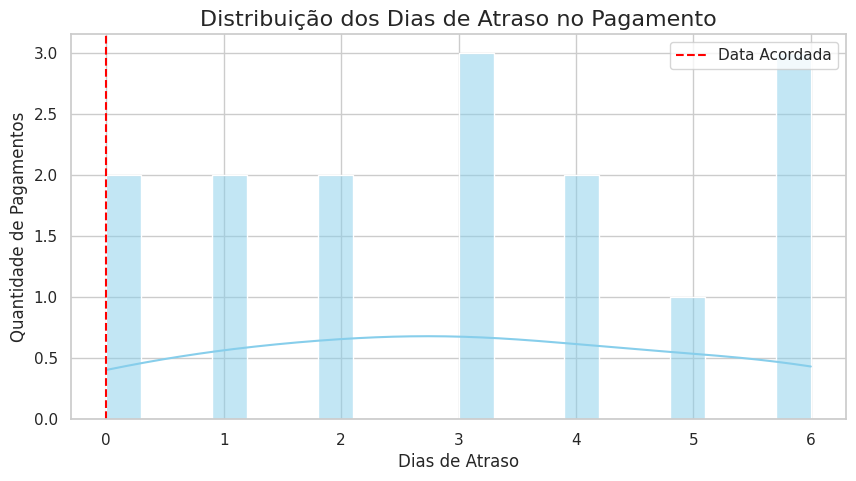

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(dados_normalizados['dias_atraso'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição dos Dias de Atraso no Pagamento', fontsize=16)
plt.xlabel('Dias de Atraso', fontsize=12)
plt.ylabel('Quantidade de Pagamentos', fontsize=12)
plt.axvline(0, color='red', linestyle='--', label='Data Acordada')
plt.legend()
plt.show()


## Status dos Pagamentos

Um gráfico de barras mostra a quantidade de pagamentos "Em Dia" e "Atrasado".

<ipython-input-29-fe60a698dd46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status_pagamento', data=dados_normalizados, palette='Set2')


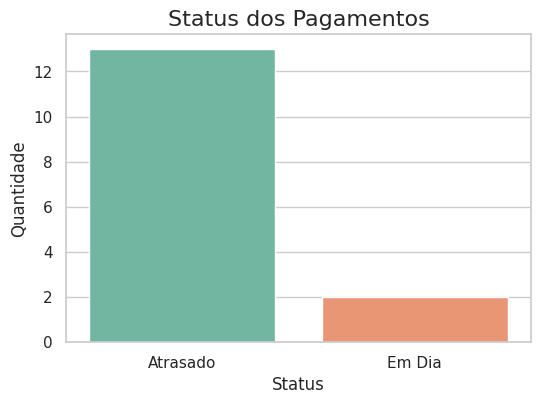

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status_pagamento', data=dados_normalizados, palette='Set2')
plt.title('Status dos Pagamentos', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.show()


## Análises Adicionais

Top 5 Apartamentos com Mais Atrasos
Os apartamentos com maior número de atrasos são identificados.

In [30]:
top_atrasos = dados_normalizados[dados_normalizados['status_pagamento'] == 'Atrasado']
top_atrasos = top_atrasos.groupby('apartamento').size().reset_index(name='quantidade_atrasos')
top_atrasos = top_atrasos.sort_values(by='quantidade_atrasos', ascending=False).head(5)
print("Top 5 Apartamentos com Mais Atrasos:")
print(top_atrasos)


Top 5 Apartamentos com Mais Atrasos:
      apartamento  quantidade_atrasos
0  A101 (blocoAP)                   1
1  B201 (blocoAP)                   1
2  B202 (blocoAP)                   1
3  C301 (blocoAP)                   1
4  C302 (blocoAP)                   1


## Média de Dias de Atraso por Apartamento

Calcula-se a média de dias de atraso por apartamento.

In [31]:
media_atraso = dados_normalizados[dados_normalizados['status_pagamento'] == 'Atrasado']
media_atraso = media_atraso.groupby('apartamento')['dias_atraso'].mean().reset_index()
media_atraso.columns = ['apartamento', 'media_dias_atraso']
media_atraso = media_atraso.sort_values(by='media_dias_atraso', ascending=False)
print("\nMédia de Dias de Atraso por Apartamento:")
print(media_atraso.head(5))



Média de Dias de Atraso por Apartamento:
       apartamento  media_dias_atraso
8   F601 (blocoAP)                6.0
7   E502 (blocoAP)                6.0
10  G701 (blocoAP)                6.0
3   C301 (blocoAP)                5.0
0   A101 (blocoAP)                4.0


## Visualização da Média de Atraso por Apartamento (Top 5)

Um gráfico de barras é gerado para visualizar os apartamentos com maior média de dias de atraso.

<ipython-input-32-282b1c21c3a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='media_dias_atraso', y='apartamento', data=media_atraso.head(5), palette='viridis')


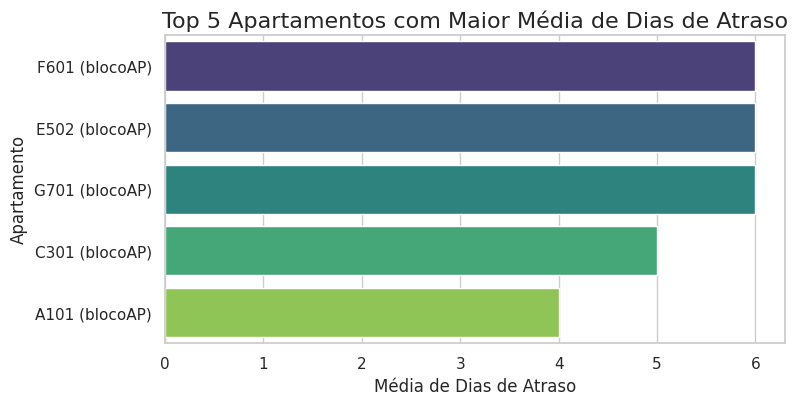

In [32]:
plt.figure(figsize=(8, 4))
sns.barplot(x='media_dias_atraso', y='apartamento', data=media_atraso.head(5), palette='viridis')
plt.title('Top 5 Apartamentos com Maior Média de Dias de Atraso', fontsize=16)
plt.xlabel('Média de Dias de Atraso', fontsize=12)
plt.ylabel('Apartamento', fontsize=12)
plt.show()


## Conclusão

Este notebook fornece uma análise detalhada sobre os pagamentos de locação de imóveis, permitindo identificar padrões de atrasos e apartamentos com problemas recorrentes. As visualizações geradas ajudam a destacar áreas que necessitam de atenção, como o comportamento de atraso dos pagamentos.